In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
k0=10
delta_k=1
t0=0
t_max=1
J=200
delta_x=30/J
x=np.linspace(-5,25,201)
psi_brzeg = 0
delta_t = 0.002

v0=105
sigma=0.5

In [3]:
def Vj(i):
    return 0;
    #return v0*np.exp(-(i-10)**2/sigma/sigma)

def getMatrixA():
    matrixA = np.zeros((J-1,J-1),dtype=complex)
    for i in range(J-1):
        matrixA[i,i] = 1+1j*delta_t/2*(2/delta_x/delta_x+Vj(i))
        if i!=0:
            matrixA[i,i-1]=-1j*delta_t/2/delta_x/delta_x
        if i!=J-2:
            matrixA[i,i+1]=-1j*delta_t/2/delta_x/delta_x
        
    return matrixA    

matrixA = getMatrixA()

In [4]:
def getPsi0(x):
    psi = np.sqrt(delta_k)/(np.pi)**(0.25)*np.exp(-x*x*delta_k*delta_k/2)*np.exp(1j*k0*x)
    return psi

In [5]:
psi0 = []
for xi in x:
    if xi==-5 or xi==25:
        psi0.append(0)
    else:
        psi0.append(getPsi0(xi))
psi0=np.array(psi0)

In [6]:
def getRs(psi0):
    newPsi = []
    for i in range(J-1):
        myR = psi0[i+1]+1j*delta_t/2*((psi0[i+2]-2*psi0[i+1]+psi0[i])/(delta_x*delta_x)-Vj(i)*psi0[i+1])
        newPsi.append(myR)
    newPsi = np.array(newPsi)
    return newPsi

r0 = getRs(psi0)

In [7]:
def getNewPsi(psi,rs):
    newPsi = []
    result = np.linalg.solve(matrixA,rs)
    newPsi.append(0)
    for i in range(J-1):
        newPsi.append(result[i])
    newPsi.append(0)
    newPsi = np.array(newPsi)
    return newPsi
newPsi = getNewPsi(psi0,r0)

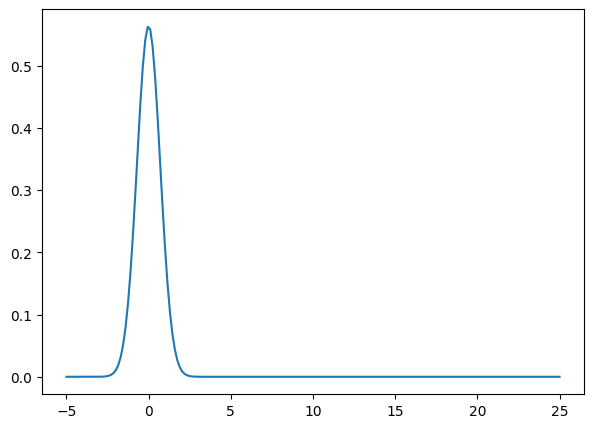

In [8]:
fig = plt.figure(figsize=(7,5), dpi=100)
plt.plot(x,np.abs(psi0)**2)

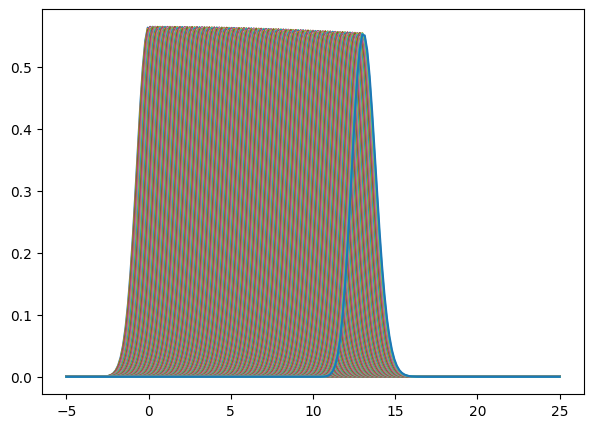

In [9]:
t=np.linspace(t0,t_max,500)
fig = plt.figure(figsize=(7,5), dpi=100)
newPsi = psi0
newRs = r0
plt.plot(x,np.abs(newPsi)**2)

sums = []
for i in t:
    suma = 0
    newPsi=getNewPsi(newPsi,newRs)
    newRs = getRs(newPsi)
    plt.plot(x,np.abs(newPsi)**2)
    for ps in newPsi:
        suma+=delta_x*np.abs(ps)**2
    sums.append(suma)


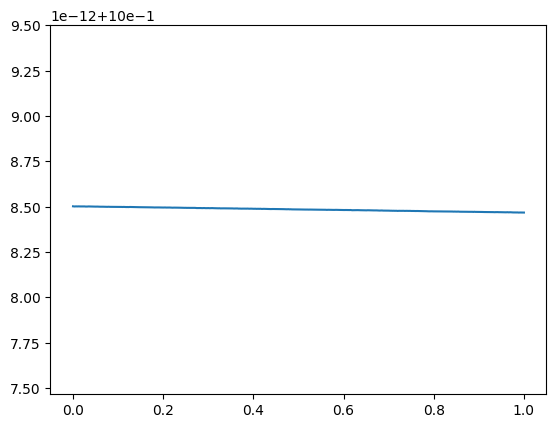

In [10]:
plt.plot(t,sums)